In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
path_root = '/home/hwkang/jupyter/root/'

In [ ]:
files_XO = [
    path_root+'result/exp09/metrics/XO_F_000.csv',
    path_root+'result/exp09/metrics/XO_F_025.csv',
    path_root+'result/exp09/metrics/XO_F_050.csv',
    path_root+'result/exp09/metrics/XO_F_075.csv',
    path_root+'result/exp09/metrics/XO_F_100.csv',
]

files_OO = [
    path_root+'result/exp09/metrics/OO_F_000.csv',
    path_root+'result/exp09/metrics/OO_F_025.csv',
    path_root+'result/exp09/metrics/OO_F_050.csv',
    path_root+'result/exp09/metrics/OO_F_075.csv',
    path_root+'result/exp09/metrics/OO_F_100.csv',
]

files_XO_101 = [
    path_root+'result/exp09/metrics/XO_resnet101_cifar10_000.csv',
    path_root+'result/exp09/metrics/XO_resnet101_cifar10_025.csv',
    path_root+'result/exp09/metrics/XO_resnet101_cifar10_050.csv',
    path_root+'result/exp09/metrics/XO_resnet101_cifar10_075.csv',
    path_root+'result/exp09/metrics/XO_resnet101_cifar10_100.csv',
]

files_OO_101 = [
    path_root+'result/exp09/metrics/OO_resnet101_cifar10_000.csv',
    path_root+'result/exp09/metrics/OO_resnet101_cifar10_025.csv',
    path_root+'result/exp09/metrics/OO_resnet101_cifar10_050.csv',
    path_root+'result/exp09/metrics/OO_resnet101_cifar10_075.csv',
    path_root+'result/exp09/metrics/OO_resnet101_cifar10_100.csv',
]

In [66]:
files_SNN = [
    path_root+'result/exp09/metrics/SNN_000.csv',
    path_root+'result/exp09/metrics/SNN_025.csv',
    path_root+'result/exp09/metrics/SNN_050.csv',
    path_root+'result/exp09/metrics/SNN_075.csv',
    path_root+'result/exp09/metrics/SNN_100.csv',
]

In [48]:
dfs_XO = [pd.read_csv(file) for file in files_XO]
dfs_OO = [pd.read_csv(file) for file in files_OO]
dfs_XO_101 = [pd.read_csv(file) for file in files_XO_101]
dfs_OO_101 = [pd.read_csv(file) for file in files_OO_101]

In [67]:
dfs_SNN = [pd.read_csv(file) for file in files_SNN]

In [62]:
f1_scores_XO = [df['f1-score'].dropna().values for df in dfs_XO]
f1_scores_OO = [df['f1-score'].dropna().values for df in dfs_OO]
f1_scores_XO_101 = [df['accuracy'].dropna().values for df in dfs_XO_101]
f1_scores_OO_101 = [df['accuracy'].dropna().values for df in dfs_OO_101]

In [68]:
accuracy_SNN = [df['accuracy'].dropna().values for df in dfs_SNN]

In [63]:
median_XO = [np.median(scores) for scores in f1_scores_XO]
median_OO = [np.median(scores) for scores in f1_scores_OO]
median_XO_101 = [np.median(scores) for scores in f1_scores_XO_101]
median_OO_101 = [np.median(scores) for scores in f1_scores_OO_101]

In [69]:
median_SNN = [np.median(accuracy) for accuracy in accuracy_SNN]

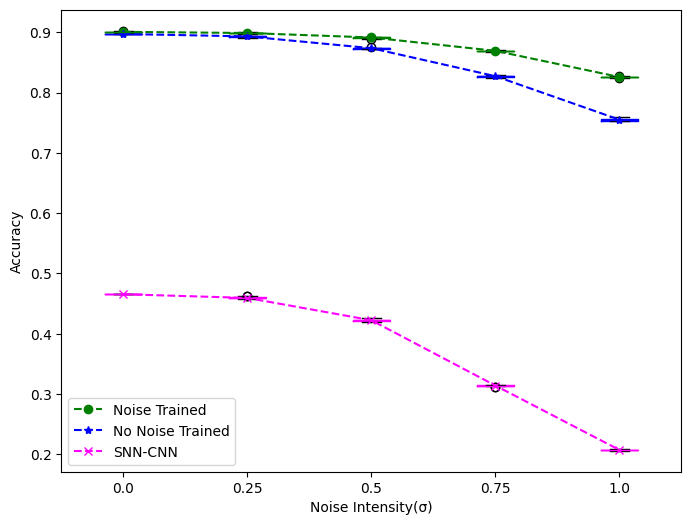

In [76]:
# 박스 플롯 생성
plt.figure(figsize=(8, 6))

# 두 개의 박스 플롯을 한 그래프에 그립니다.
#plt.boxplot(f1_scores_XO, widths=0.3, boxprops=dict(color='blue'), medianprops=dict(color='blue'))
#plt.boxplot(f1_scores_OO, widths=0.3, boxprops=dict(color='green'), medianprops=dict(color='green'))
plt.boxplot(f1_scores_XO_101, widths=0.3, boxprops=dict(color='blue'), medianprops=dict(color='blue'))
plt.boxplot(f1_scores_OO_101, widths=0.3, boxprops=dict(color='green'), medianprops=dict(color='green'))
plt.boxplot(accuracy_SNN, widths=0.3, boxprops=dict(color='magenta'), medianprops=dict(color='magenta'))

# XO와 OO의 중앙값을 구하여 추세선을 추가합니다.

#plt.plot([1,2,3,4,5], median_XO, color='blue', linestyle='--', marker='o', label='No Noise Trained(50)')
#plt.plot([1,2,3,4,5], median_OO, color='green', linestyle='--', marker='o', label='Noise Trained(50)')
plt.plot([1,2,3,4,5], median_OO_101, color='green', linestyle='--', marker='o', label='Noise Trained')
plt.plot([1,2,3,4,5], median_XO_101, color='blue', linestyle='--', marker='*', label='No Noise Trained')
plt.plot([1,2,3,4,5], median_SNN, color='magenta', linestyle='--', marker='x', label='SNN-CNN')

# 그래프 제목 및 축 라벨 설정
plt.xlabel('Noise Intensity(σ)')
plt.ylabel('Accuracy')
plt.xticks(ticks=[1,2,3,4,5], labels=['0.0', '0.25', '0.5', '0.75', '1.0'])

# 범례 추가
plt.legend()

plt.savefig('accuracy_development_on_varying_noise_intensity.png')

# 그래프를 화면에 표시
plt.show()